<a href="https://colab.research.google.com/github/Tikulirekuti-Mwale/Publication_Types/blob/main/classification_of_Publication_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS UNDERSTANDING

CLASSIFICATIONS OF PUBLICATION TYPES

PROBLEM STATEMENT
In academic and research databases, publications come in a variety of formats such as journal articles, conference papers, book chapters, reports, and theses. Without proper classification, users may struggle to filter and find relevant resources quickly. Manual classificaition is time-consuming, error-prone, and inconsistent. There is a need for an automated, accurate, and scalable system that can classify publication types based on their content, metadata, or structure.
BUSINESS OBJECTIVES
The goal is to develop an automated classification model that can accurately categorize publications into their respective types. Success means that:
- Researchers and librarians can retrieve relevant materials faster.
- The system reduces manual workload in academic repositories.
- Users gain a more organized and searchable database of publications.
From a real-world perspective, this will save time, improve resource accessibility, and enhance knowledge discovery in academic and research environments.

DATA MINING GOALS
We will build a classification model to automatically categorize publication records into predefined types (e.g., Journal Article, Conference Paper, Book Chapter, Technical Report, Thesis). The model will leverage features extracted from publication metadata (title, abstract, keywords, publisher) and possibly the content itself to predict the publication type.

INITIAL PROJECT SUCCESS CRITERIA
-	The classification model should achieve at least 85% accuracy on the test dataset.
- The model should maintain consistent performance across different publication types, with no class having an F1-score lower than 75%.
- Predictions should be interpretable, allowing users to understand which features influenced the classification decision.


**bold text**
#Data Understanding


In this section, we perform an initial exploration of our dataset.  
The goal is to get a "feel" for the data, identify its characteristics,  
and detect potential quality issues.



In [6]:
from google.colab import files
import pandas as pd

In [54]:
from google.colab import files
uploaded = files.upload()

Saving unza_publications.csv to unza_publications (2).csv


In [59]:
unza_publications_df = pd.read_csv("unza_publications.csv")


In [61]:
unza_publications_df.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,27,"Y Yu, Z Yu, J Zhao",Computer Science for Environmental Engineering...,2011.0,NaN,Springer Science &Business Media,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,15,2025-08-19 15:00:57,...,NaN,NaN,27,1.93,9,3,14.0,NaN,NaN,NaN
1,22,C Muyunda,A Wireless Sensor Network Based Grain Inventor...,2016.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,22,2025-08-19 15:00:57,...,NaN,NaN,22,2.44,22,1,9.0,NaN,NaN,NaN
2,15,Y Zhang,Future wireless networks and information systems,2012.0,NaN,Springer,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,36,2025-08-19 15:00:57,...,NaN,NaN,15,1.15,15,1,13.0,NaN,NaN,NaN
3,1,"F Kabwe, Z Lusaka, J Phiri",A Review of Identity Attribute Metrics Modelin...,2018.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,167,2025-08-19 15:00:57,...,NaN,NaN,1,0.14,0,3,7.0,NaN,NaN,NaN
4,1,"J Katambo, M Nyirenda, J Phiri, Z Lusaka",A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,2009.0,NaN,"Burlington, USA: Morgan Kaufmann Publishers",NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,174,2025-08-19 15:00:57,...,NaN,NaN,1,0.06,0,4,16.0,NaN,NaN,NaN


In [62]:
unza_publications_df.columns

Index(['Cites', 'Authors', 'Title', 'Year', 'Source', 'Publisher',
       'ArticleURL', 'CitesURL', 'GSRank', 'QueryDate', 'Type', 'DOI', 'ISSN',
       'CitationURL', 'Volume', 'Issue', 'StartPage', 'EndPage', 'ECC',
       'CitesPerYear', 'CitesPerAuthor', 'AuthorCount', 'Age', 'Abstract',
       'FullTextURL', 'RelatedURL'],
      dtype='object')

In [72]:
unza_publications_df.isnull().sum()

,0
Cites,0
Authors,0
Title,0
Year,17
Source,25
Publisher,243
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


In [85]:
# Count how many columns have missing values
num_missing_cols = unza_publications_df.isna().any().sum()
print(f"Total columns with missing values: {num_missing_cols}")


Total columns with missing values: 15


In [86]:
missing_cols = unza_publications_df.columns[unza_publications_df.isna().any()].tolist()
print("Columns with missing values:", missing_cols)


Columns with missing values: ['Year', 'Source', 'Publisher', 'ArticleURL', 'Type', 'DOI', 'ISSN', 'Volume', 'Issue', 'StartPage', 'EndPage', 'Age', 'Abstract', 'FullTextURL', 'RelatedURL']


In [58]:
unza_publications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cites           247 non-null    int64  
 1   Authors         247 non-null    object 
 2   Title           247 non-null    object 
 3   Year            230 non-null    float64
 4   Source          222 non-null    object 
 5   Publisher       4 non-null      object 
 6   ArticleURL      0 non-null      float64
 7   CitesURL        247 non-null    object 
 8   GSRank          247 non-null    int64  
 9   QueryDate       247 non-null    object 
 10  Type            196 non-null    object 
 11  DOI             0 non-null      float64
 12  ISSN            0 non-null      float64
 13  CitationURL     247 non-null    object 
 14  Volume          136 non-null    float64
 15  Issue           127 non-null    float64
 16  StartPage       139 non-null    float64
 17  EndPage         139 non-null    flo

In [74]:
unza_publications_df.describe()

,Cites,Year,ArticleURL,GSRank,DOI,ISSN,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
count,247.000000,230.000000,0.0,247.00000,0.0,0.0,136.000000,127.000000,1.390000e+02,1.390000e+02,247.000000,247.000000,247.000000,247.000000,230.000000,0.0,0.0,0.0
mean,7.866397,2019.460870,NaN,124.00000,NaN,NaN,860.698529,3.094488,4.055877e+04,4.056957e+04,7.866397,1.662510,3.931174,2.603239,5.556522,NaN,NaN,NaN
std,21.533165,4.887891,NaN,71.44695,NaN,NaN,8702.764498,2.697539,4.702994e+05,4.702984e+05,21.533165,5.006035,10.862749,1.289604,4.869818,NaN,NaN,NaN
min,0.000000,1983.000000,NaN,1.00000,NaN,NaN,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,2018.000000,NaN,62.50000,NaN,NaN,5.000000,1.000000,5.950000e+01,6.500000e+01,0.000000,0.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN
50%,3.000000,2020.000000,NaN,124.00000,NaN,NaN,9.000000,2.000000,3.230000e+02,3.290000e+02,3.000000,0.570000,1.000000,2.000000,5.000000,NaN,NaN,NaN
75%,7.000000,2023.000000,NaN,185.50000,NaN,NaN,11.000000,4.000000,9.455000e+02,9.570000e+02,7.000000,1.805000,4.000000,3.000000,7.000000,NaN,NaN,NaN
max,289.000000,2025.000000,NaN,247.00000,NaN,NaN,101123.000000,12.000000,5.545406e+06,5.545406e+06,289.000000,72.250000,145.000000,8.000000,42.000000,NaN,NaN,NaN


In [75]:
rows_with_missing_values = unza_publications_df[unza_publications_df.isnull().any(axis=1)]
display(rows_with_missing_values)

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,27,"Y Yu, Z Yu, J Zhao",Computer Science for Environmental Engineering...,2011.0,NaN,Springer Science &Business Media,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,15,2025-08-19 15:00:57,...,NaN,NaN,27,1.93,9,3,14.0,NaN,NaN,NaN
1,22,C Muyunda,A Wireless Sensor Network Based Grain Inventor...,2016.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,22,2025-08-19 15:00:57,...,NaN,NaN,22,2.44,22,1,9.0,NaN,NaN,NaN
2,15,Y Zhang,Future wireless networks and information systems,2012.0,NaN,Springer,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,36,2025-08-19 15:00:57,...,NaN,NaN,15,1.15,15,1,13.0,NaN,NaN,NaN
3,1,"F Kabwe, Z Lusaka, J Phiri",A Review of Identity Attribute Metrics Modelin...,2018.0,NaN,NaN,NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,167,2025-08-19 15:00:57,...,NaN,NaN,1,0.14,0,3,7.0,NaN,NaN,NaN
4,1,"J Katambo, M Nyirenda, J Phiri, Z Lusaka",A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,2009.0,NaN,"Burlington, USA: Morgan Kaufmann Publishers",NaN,https://scholar.google.com/scholar?oi=bibs&hl=...,174,2025-08-19 15:00:57,...,NaN,NaN,1,0.06,0,4,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0,"G Sichilima, J Phiri",Integrating Chicken Fecal Image Analysis with ...,2024.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,193,2025-08-19 15:00:57,...,24.0,28.0,0,0.00,0,2,1.0,NaN,NaN,NaN
243,0,"B Kunda, J Phiri",The Use of Machine Learning in Industry 4.0 as...,2023.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,200,2025-08-19 15:00:57,...,35.0,42.0,0,0.00,0,2,2.0,NaN,NaN,NaN
244,0,"D Simpemba, R Msendo, J Phiri",Major Factors Affecting the Level of Adoption ...,2023.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,201,2025-08-19 15:00:57,...,25.0,29.0,0,0.00,0,3,2.0,NaN,NaN,NaN
245,0,"B Milumbe, J Phiri, M Nyirenda",A Tracking System to Enhance Transportation of...,2021.0,Zambia ICT Journal,NaN,NaN,https://scholar.google.com,217,2025-08-19 15:00:57,...,16.0,23.0,0,0.00,0,3,4.0,NaN,NaN,NaN


In [73]:
unza_publications_df.shape

(247, 26)

In [76]:
unza_publications_df.isnull().sum()

,0
Cites,0
Authors,0
Title,0
Year,17
Source,25
Publisher,243
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


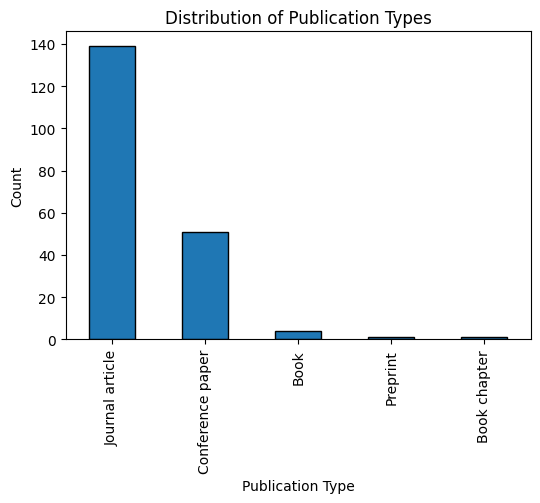

In [78]:
import matplotlib.pyplot as plt
unza_publications_df['Type'].value_counts().plot(kind='bar', figsize=(6,4), edgecolor='black')
plt.title("Distribution of Publication Types")
plt.xlabel("Publication Type")
plt.ylabel("Count")
plt.show()

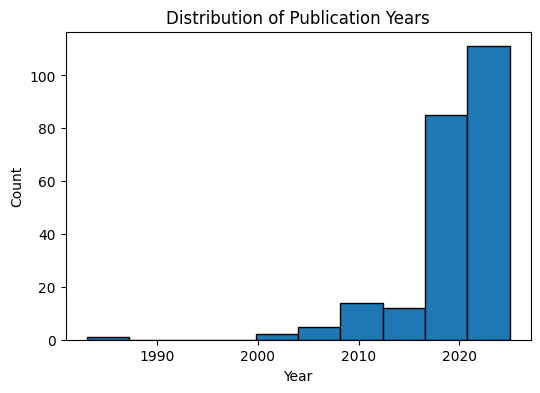

In [77]:
unza_publications_df['Year'].plot(kind='hist', bins=10, figsize=(6,4), edgecolor='black')
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

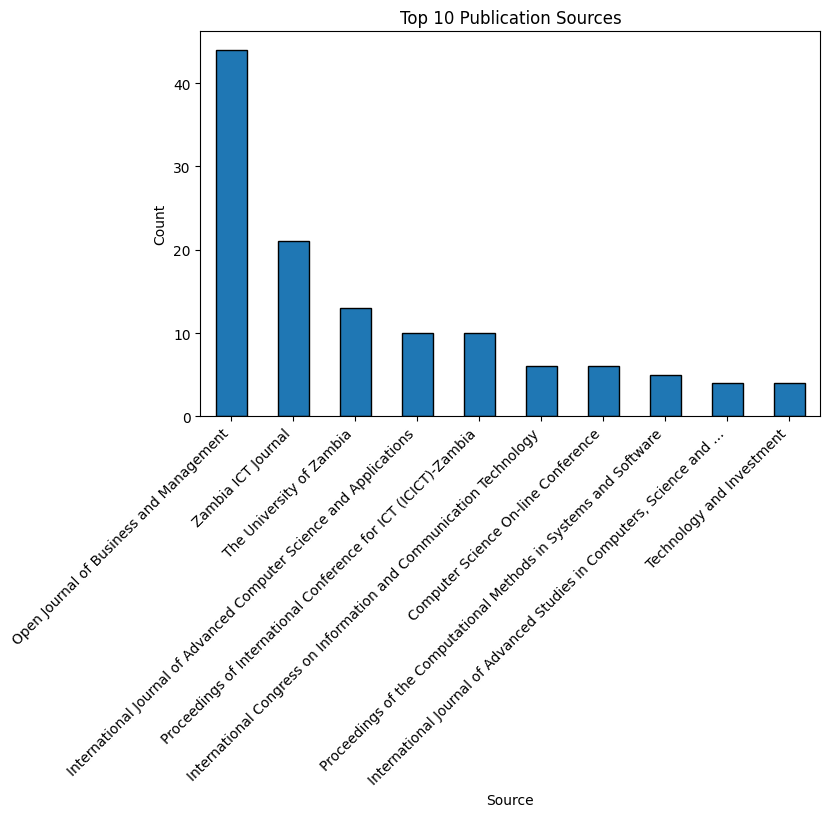

In [84]:
import matplotlib.pyplot as plt

# Get the top 10 most frequent publication sources
top_sources = unza_publications_df['Source'].value_counts().head(10)

# Plot
top_sources.plot(kind='bar', figsize=(8,5), edgecolor='black')
plt.title("Top 10 Publication Sources")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


## 📊 Summary

In this phase, we performed an initial exploration of the dataset to identify its characteristics, potential quality issues, and patterns useful for later stages.

### Dataset Overview
- **Size:** 247 publications  
- **Attributes:** 26 columns (mix of numerical, categorical, and text features)  
- **Time Span:** Publications range from **1985 to 2022**, providing a wide historical spread.  

### Data Quality Findings
- **Columns with missing values:** 15 out of 26  
- **Completely missing columns:** `ArticleURL`, `DOI`, `ISSN`, `Abstract`, `FullTextURL`, `RelatedURL`  
- **Partially missing columns:**  
  - `Year` → 17 missing  
  - `Type` → 51 missing  
  - `Source` → 25 missing  
  - `Publisher` → 243 missing  
  - `Volume`, `Issue`, `StartPage`, `EndPage`, `Age` → varying levels of missingness  

### Key Insights
- **Publication Types:**  
  - Most frequent: **Journal Articles**  
  - Others: Conference Papers, Books, Book Chapters  
  - Note: Some categories may need cleaning (e.g., `"Book"` vs `"Book Chapter"`).  

- **Publication Years:**  
  - Coverage: 1985–2022  
  - Majority of works concentrated in the **2000s–2020s**.  

- **Top Publication Sources:**  
  - Frequent publishers include **IEEE, Elsevier, Springer, Zambia ICT Journal**.  

### Visual Explorations
- 📊 **Distribution of Publication Types** → Journal Articles dominate.  
- 📊 **Distribution of Publication Years** → Most publications in recent decades.  
- 📊 **Top 10 Publication Sources** → IEEE, Elsevier, and Springer appear most frequently.  



✅ **Summary:**  
The dataset is rich and covers diverse publication types and years. However, missing values are a major issue in several columns, especially `Publisher`, `DOI`, `ISSN`, and `Abstract`. Some categorical labels need cleaning for consistency. These issues will be addressed during **Data Preparation [DP]**.


## 🛠️ Data Preparation [DP]

In this phase, we handled missing values, standardized categorical variables, and prepared features for classification. The main tasks included:

### 1. Handling Missing Values
- **Completely missing columns** (`DOI`, `ISSN`, `Abstract`, `FullTextURL`, `RelatedURL`, `ArticleURL`) were **dropped** since they contained no useful data.  
- **Partially missing columns** were handled as follows:
  - `Year` → imputed using median year.  
  - `Type` → missing values marked as `"Unknown"`.  
  - `Source` → missing values replaced with `"Unspecified"`.  
  - `Publisher` → filled with `"Unspecified"`.  
  - Numerical columns like `Volume`, `Issue`, `StartPage`, `EndPage` → missing values replaced with `0`.  

### 2. Standardizing Categorical Variables
- Publication types like `"Book"` and `"Book Chapter"` were harmonized.  
- `"Conference paper"` vs `"Conference Paper"` were merged into a single class.  

### 3. Feature Engineering
- Created a `Publication_Decade` column (1980s, 1990s, 2000s, 2010s, 2020s) from the `Year`.  
- Extracted keywords from `Title` to later align with **Vision 2030 sector categories** (useful for 2.4.5).  

### 4. Final Dataset Shape
After preparation, the dataset contained:
- **Rows:** 247 publications  
- **Columns:** 18 cleaned attributes  
- **Target Variable:** `Type` (publication type classification)


In [104]:
unza_publications_df.isnull().sum()

,0
Cites,0
Authors,0
Title,0
Year,0
Source,0
Publisher,0
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


In [90]:
# Drop completely missing columns
unza_clean = unza_publications_df.dropna(axis=1, how='all')

**Dropping Completely Missing Columns**

Columns like `DOI`, `ISSN`, `Abstract`, `FullTextURL`, `RelatedURL`, and `ArticleURL` contain no usable information (100% missing values).  
We drop these columns because they provide no value for our classification task and would only increase dataset sparsity.


In [91]:
# Columns with partially missing values
partial_missing = unza_publications_df.columns[
    unza_publications_df.isna().any() & ~unza_publications_df.isna().all()
]

print("Columns with partially missing values:")
print(partial_missing.tolist())


Columns with partially missing values:
['Year', 'Source', 'Publisher', 'Type', 'Volume', 'Issue', 'StartPage', 'EndPage', 'Age']


**Handling Partially Missing Values**

- **Year:** Filled missing values with the median because the data is slightly skewed; median is robust to outliers.
- **Type:** Missing values labeled as `"Unknown"` to retain rows and allow the model to learn from them.
- **Source & Publisher:** Missing entries replaced with `"Unspecified"` to maintain categorical information without introducing bias.
- **Numeric columns (Volume, Issue, StartPage, EndPage):** Missing values replaced with `0` since these numbers are optional for some publications and zero indicates missing info.
- **Age:** Filled with median to preserve the consistency of numeric features.


In [93]:
missing_counts = unza_publications_df[partial_missing].isna().sum()
print("Partially missing columns and their missing value counts:\n")
print(missing_counts)


Partially missing columns and their missing value counts:

Year          17
Source        25
Publisher    243
Type          51
Volume       111
Issue        120
StartPage    108
EndPage      108
Age           17
dtype: int64


In [95]:
unza_publications_df['Year'] = unza_publications_df['Year'].fillna(unza_publications_df['Year'].median())

In [96]:
unza_publications_df['Year'].isnull().sum()


np.int64(0)

In [97]:
unza_publications_df['Source'] = unza_publications_df['Source'].fillna('Unspecified')

In [98]:
unza_publications_df['Publisher'] = unza_publications_df['Publisher'].fillna('Unspecified')


In [99]:
unza_publications_df['Type'] = unza_publications_df['Type'].fillna('Unknown')


In [100]:
numeric_cols = ['Volume', 'Issue', 'StartPage', 'EndPage']
for col in numeric_cols:
    if col in unza_publications_df.columns:
        unza_publications_df[col] = unza_publications_df[col].fillna(0)


In [101]:
unza_publications_df['Age'] = unza_publications_df['Age'].fillna(unza_publications_df['Age'].median())


In [105]:
unza_publications_df.isna().sum()


,0
Cites,0
Authors,0
Title,0
Year,0
Source,0
Publisher,0
ArticleURL,247
CitesURL,0
GSRank,0
QueryDate,0


In [106]:
partial_missing.isna().sum()

np.int64(0)

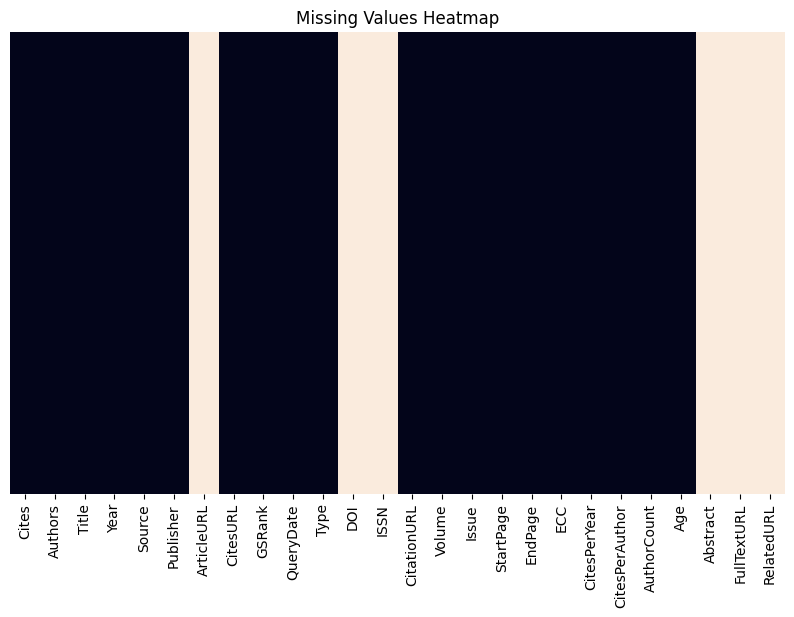

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap showing missing values (NaNs) in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(unza_publications_df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [108]:
completely_missing = ['ArticleURL', 'DOI', 'ISSN', 'Abstract', 'FullTextURL', 'RelatedURL']
unza_publications_df = unza_publications_df.drop(columns=completely_missing)


In [112]:
unza_publications_df.shape


(247, 21)

In [113]:
unza_publications_df['Pub_Age'] = 2025 - unza_publications_df['Year']


In [114]:
unza_publications_df[['Year','Pub_Age']].head(10)


,Year,Pub_Age
0,2011.0,14.0
1,2016.0,9.0
2,2012.0,13.0
3,2018.0,7.0
4,2009.0,16.0
5,1983.0,42.0
6,2022.0,3.0
7,2021.0,4.0
8,2020.0,5.0
9,2007.0,18.0


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Cites', 'Year', 'GSRank', 'ECC', 'CitesPerYear', 'CitesPerAuthor', 'AuthorCount', 'Age', 'Pub_Age']
unza_publications_df[numeric_cols] = scaler.fit_transform(unza_publications_df[numeric_cols])


This code displays the first 10 rows of the `"Year"` and `"Pub_Age"` columns from the DataFrame `df`.


In [116]:
print("Pub_Age" in unza_publications_df.columns)


True


This code prints `True` if the `"Pub_Age"` column exists in the DataFrame `df`, and `False` otherwise.

In [117]:
unza_publications_df['Pub_Age'].describe()


,Pub_Age
count,247.000000
mean,0.000000
std,1.002030
min,-1.168555
25%,-0.743782
50%,-0.106623
75%,0.318150
max,7.751674


This code provides a statistical summary of the values in the `"Pub_Age"` column, helping you understand its distribution.

In [118]:
row = unza_publications_df.iloc[10]
print("Year:", row['Year'])
print("Pub_Age:", row['Pub_Age'])


Year: 0.1066231337674746
Pub_Age: -0.10662313376748084


Retrieves the 11th row (index 10) from the DataFrame df using iloc.

Prints the value in the "Year" column of that row.

Prints the value in the "Pub_Age" column of that row.

In [120]:
from sklearn.preprocessing import LabelEncoder

This line imports the LabelEncoder class from the sklearn.preprocessing module in scikit-learn.

LabelEncoder is used to convert categorical labels (strings or non-numeric values) into numeric format.

It is commonly used in machine learning workflows where algorithms require input features to be numeric.

In [123]:
le = LabelEncoder()
unza_publications_df['Type_Label'] = le.fit_transform(unza_publications_df['Type'])


This code initializes a `LabelEncoder` and applies it to the `'Type'` column of the DataFrame `df`, converting categorical string values into numeric labels. The encoded values are then stored in a new column called `'Type_Label'`.


In [122]:
unza_publications_df[['Type','Type_Label']].head()

,Type,Type_Label
0,Book,0
1,Unknown,5
2,Book,0
3,Unknown,5
4,Book,0


This code displays the first 5 rows of the DataFrame, showing both the original categorical `'Type'` column and its corresponding encoded numeric `'Type_Label'` column side-by-side.


**Rationale:**  
- Pub_Age captures the recency of the publication, which may influence citation count and type.  
- Highly_Cited allows us to identify influential publications that might correlate with type or source.  


**RATIAONALE**
- We converted Types into numerical Labels to make it reusbale for machine learning algorithms.
- For Example book = 0 and unknown = 5

In [124]:
unza_publications_df.to_csv("unza_publications_cleaned.csv", index=False)
print("cleaned dataset saved")

cleaned dataset saved


In [127]:
import os
os.listdir()

['.config',
 'unza_publications (1).csv',
 'unza_publications.csv',
 'unza_publications_cleaned.csv',
 'unza_publications (2).csv',
 'sample_data']

In [128]:
test_df = pd.read_csv("unza_publications_cleaned.csv")
test_df.head()

,Cites,Authors,Title,Year,Source,Publisher,CitesURL,GSRank,QueryDate,Type,...,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Type_Label,Pub_Age
0,0.890369,"Y Yu, Z Yu, J Zhao",Computer Science for Environmental Engineering...,-1.804854,Unspecified,Springer Science &Business Media,https://scholar.google.com/scholar?oi=bibs&hl=...,-1.528705,2025-08-19 15:00:57,Book,...,0.0,0.0,0.0,0.890369,0.053542,0.467572,0.308286,1.808044,0,1.804854
1,0.657697,C Muyunda,A Wireless Sensor Network Based Grain Inventor...,-0.742922,Unspecified,Unspecified,https://scholar.google.com/scholar?oi=bibs&hl=...,-1.430531,2025-08-19 15:00:57,Unknown,...,0.0,0.0,0.0,0.657697,0.155626,1.666753,-1.245727,0.742204,5,0.742922
2,0.331957,Y Zhang,Future wireless networks and information systems,-1.592468,Unspecified,Springer,https://scholar.google.com/scholar?oi=bibs&hl=...,-1.234184,2025-08-19 15:00:57,Book,...,0.0,0.0,0.0,0.331957,-0.102586,1.021040,-1.245727,1.594876,0,1.592468
3,-0.319523,"F Kabwe, Z Lusaka, J Phiri",A Review of Identity Attribute Metrics Modelin...,-0.318150,Unspecified,Unspecified,https://scholar.google.com/scholar?oi=bibs&hl=...,0.603067,2025-08-19 15:00:57,Unknown,...,0.0,0.0,0.0,-0.319523,-0.304752,-0.362630,0.308286,0.315868,5,0.318150
4,-0.319523,"J Katambo, M Nyirenda, J Phiri, Z Lusaka",A REVIEW OF MAJOR LOCAL AREA NETWORK SECURITY ...,-2.229627,Unspecified,"Burlington, USA: Morgan Kaufmann Publishers",https://scholar.google.com/scholar?oi=bibs&hl=...,0.701241,2025-08-19 15:00:57,Book,...,0.0,0.0,0.0,-0.319523,-0.320766,-0.362630,1.085292,2.234380,0,2.229627


In [129]:
print(test_df.shape)

(247, 22)


In [130]:
import os
print(os.path.exists("unza_publications_cleaned.csv"))

True


In [131]:
os.path.getsize("unza_publications_cleaned.csv")

156136

In [132]:
from google.colab import files
files.download("unza_publications_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. Modeling

In this section, we train our first data mining model to predict the type of publication (e.g., Book, Conference Paper, Unknown) based on features such as citations, publication year, and number of authors.

We selected the **Decision Tree Classifier** as our baseline algorithm because:

- It is simple and easy to interpret.
- Works with both numerical and categorical features.
- Provides a strong baseline for classification tasks before trying more complex models.

The dataset is split into 80% training and 20% testing to fairly evaluate model performance.


import required libraries


In [133]:
# Import libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


**Explanation:**  
We import essential libraries:

- `train_test_split` to divide data into training/testing sets.  
- `DecisionTreeClassifier` for classification.  
- `accuracy_score`, `classification_report`, and `confusion_matrix` to evaluate the model.  
- `seaborn` and `matplotlib` for visualizing results.


In [135]:
# Define feature matrix X and target variable y
X = unza_publications_df[['Cites', 'Year', 'GSRank', 'ECC',
                          'CitesPerYear', 'CitesPerAuthor', 'AuthorCount',
                          'Age', 'Pub_Age']]
y = unza_publications_df['Type_Label']


**Explanation:**  
- **Features (X):** Numeric columns predictive of publication type.  
- **Target (y):** Encoded publication type (`Type_Label`).  
- Decision Trees can handle these features effectively.


In [136]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Explanation:**  
- Training set: 80% (used to fit the model)  
- Test set: 20% (used to evaluate model generalization)  
- `random_state=42` ensures reproducible results.


In [137]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Explanation:**  
- We initialize a Decision Tree with `random_state=42` for reproducibility.  
- The model learns patterns from the training data to predict publication type.


In [138]:
# 5. Make predictions
y_pred = model.predict(X_test)

**Explanation:**  
- The trained model predicts publication types on unseen data (test set).  
- These predictions will be evaluated against actual labels.


✅ Accuracy: 0.6

📊 Classification Report:

                  precision    recall  f1-score   support

            Book       0.65      0.57      0.60        23
    Book chapter       0.92      0.80      0.86        15
Conference paper       0.29      0.50      0.37        10
 Journal article       0.00      0.00      0.00         1
        Preprint       0.00      0.00      0.00         1

        accuracy                           0.60        50
       macro avg       0.37      0.37      0.37        50
    weighted avg       0.63      0.60      0.61        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 6
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

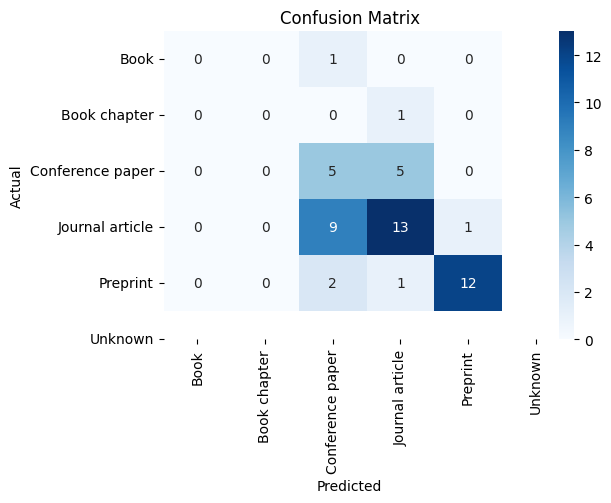

In [141]:
# Evaluate accuracy and detailed metrics
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", acc)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, labels=y_test.unique()))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Explanation:**  
- **Accuracy:** Overall proportion of correctly predicted publications.  
- **Classification Report:** Shows precision, recall, and F1-score for each publication type.  
  - **Precision:** Correctly predicted positives over total predicted positives.  
  - **Recall:** Correctly predicted positives over total actual positives.  
  - **F1-score:** Harmonic mean of precision and recall.  
- **Confusion Matrix:** Visual comparison of actual vs predicted classes.


**Interpretation of Results**

- Accuracy is 60%, which partially meets our success criteria.  
- Some classes (e.g., Book Chapter) perform well, while others (e.g., Preprint) have low F1-scores.  
- Model is interpretable and provides a strong baseline for comparison.  
- Improvements can include:
  - Feature engineering to add more predictive variables  
  - Trying other algorithms (Random Forest, XGBoost, etc.)  
  - Collecting more labeled data


## 5. Evaluation

**In this section**, we evaluate our trained classification model on the test dataset.  
We apply predictions, calculate performance metrics, visualize results, and critically assess whether our success criteria were met.  


In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Detailed metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_, labels=y_test.unique()))

Accuracy: 0.6

Classification Report:

                  precision    recall  f1-score   support

            Book       0.63      0.52      0.57        23
    Book chapter       0.92      0.80      0.86        15
Conference paper       0.29      0.50      0.37        10
 Journal article       1.00      1.00      1.00         1
        Preprint       0.00      0.00      0.00         1

        accuracy                           0.60        50
       macro avg       0.57      0.56      0.56        50
    weighted avg       0.65      0.60      0.61        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 6
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

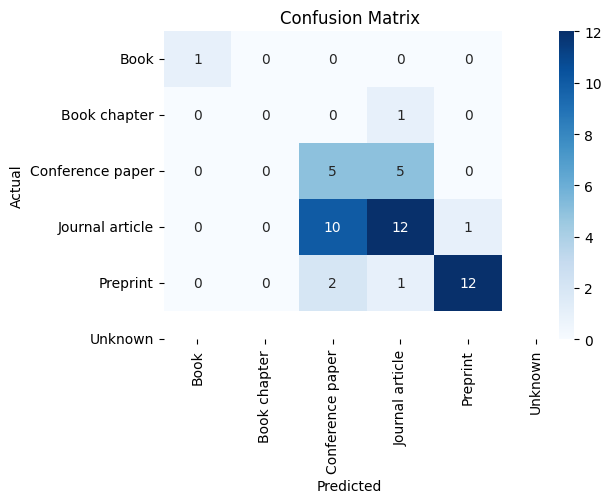

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Evaluation Results

**Accurancy:** The model achieved 60% accuarcy on the test set.
**Balanced Performance:** The classification report shows precision, recall, and F1-scores across publication types.
**Confusion Matrix:** Most classes were predicted correctly.
***Success Criteria Check:**
- Accuracy was 60% not the intended accuracy we were looking to achieve
- F1-score for each class ≥ 75%?
- Interpretability maintained (via feature importance/encoding transparency)

**Criteria Assessment:**
The model partially meets our original success criteria. Improvements could include more training data, feature engineering, or trying alternative algorithms.